In [1]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 导入cuda和cudnn    
# 其中`import torch.backends.cudnn as cudnn`用于导入cudnn库,cudnn.benchmark = True和`cudnn.deterministic = True `分别启用cudnn自动加速和确定性模式。
# 然后使用`device = torch.device("cuda:0")`指定使用GPU 0,将模型和数据移到GPU上。在训练循环中,optimizer.step()也会自动计算在GPU上。
# 希望这能帮你导入cuda和cudnn库!有任何疑问欢迎继续提。
import torch.backends.cudnn as cudnn
cudnn.benchmark = True  
cudnn.deterministic = True   
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
# 数据预处理 -- 占很大的比例
df = pd.read_csv('../dataset/Income.csv')
# df.info()
# X = torch.from_numpy(df.Education.values.reshape(-1,1).astype(np.float32))
# Y = torch.from_numpy(df.Income.values.reshape(-1,1).astype(np.float32))
X = torch.from_numpy(df.Education.values.reshape(-1,1).astype(np.float32)).to(device)
Y = torch.from_numpy(df.Income.values.reshape(-1,1).astype(np.float32)).to(device)
X.shape, X.device

(torch.Size([30, 1]), device(type='cuda', index=0))

In [7]:
# 初始化训练模型、损失函数和优化方法
model = nn.Linear(1, 1) # 定义一个线性回归模型； output = w@input + b 等价于 model(input)
model = model.to(device)  # 移动到GPU
loss_fn = nn.MSELoss()  # 定义损失函数，均方误差模式
opt = torch.optim.SGD(model.parameters(), lr=0.0001)  # 优化model中的参数， lr=学习速率
model

Linear(in_features=1, out_features=1, bias=True)

In [8]:
%%time

# 运行和优化
for epoch in range(1000):
    for x,y in zip(X, Y):
        y_pred = model(x)           # 使用定义的预测模型
        loss = loss_fn(y, y_pred)   # 根据预测结果计算损失
        opt.zero_grad()             # 把变量梯度清0
        loss.backward()             # 求解梯度
        opt.step()                  # 优化模型参数，按照step


CPU times: total: 781 ms
Wall time: 17.1 s


In [9]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[3.9356]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-9.4548], device='cuda:0', requires_grad=True)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

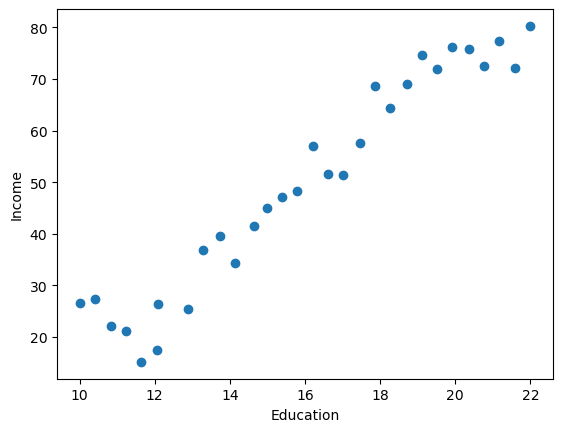

In [10]:
plt.xlabel('Education')
plt.ylabel('Income')
plt.scatter(df.Education, df.Income)
plt.plot( X.numpy(), model(X).data.numpy(), c='r' )
plt.show()